In [1]:
#### Necessary libraries ####
import numpy as np  # Numpy is the fundamental package for scientific computing in Python.
import matplotlib.pyplot as plt  # Matplotlib is a scientific plotting package.
import matplotlib.gridspec as gridspec
import pandas as pd
from combine_data import read_data
from paths import basedir, figure_path

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline

In [2]:
casenames = ["Pakistan", "Australia", "Scotland"]
exclude = ["WRF-WVT"]
exclude_from_mean = [
    "UTrack Ens1",
    "UTrack Ens3",
    "UTrack Ens4",
    "UTrack Ens5",
    "FLEXPART-HAMSTER Ens1",
    "FLEXPART-HAMSTER Ens2",
    "FLEXPART-HAMSTER Ens3",
    "FLEXPART-HAMSTER Ens4",
    "FLEXPART-WaterSip (HKUST) Ens1",
    "FLEXPART-WaterSip (HKUST) Ens3",
]

In [3]:
sel_maps = {}
corr_matrix = {}
for casename in casenames:
    all_maps = read_data(basedir, casename)

    sel_maps[casename] = all_maps.drop_vars(exclude).rename({
        "UTrack Ens2": "*UTrack Ens2",
        "FLEXPART-HAMSTER Ens5": "*FLEXPART-HAMSTER Ens5",
        "FLEXPART-WaterSip (HKUST) Ens2": "*FLEXPART-WaterSip (HKUST) Ens2",
    })

    # multi-model mean
    map_array = sel_maps[casename].drop_vars(exclude_from_mean).to_array()
    sel_maps[casename]["multi-method mean"] = map_array.mean(dim="variable", skipna=True)

    corr_dict = {}
    for i, (name1, dataset1) in enumerate(sel_maps[casename].data_vars.items()):
        print(name1)
        corr_dict[name1] = {}
        for j, (name2, dataset2) in enumerate(sel_maps[casename].data_vars.items()):
            nanind = ~np.isnan(dataset1.values) & ~np.isnan(dataset2.values)
            corr_dict[name1][name2] = np.corrcoef(
                dataset1.values[nanind], dataset2.values[nanind]
            )[1, 0]

    corr_matrix[casename] = pd.DataFrame(corr_dict)

Loading WRF-WVT data for Pakistan
Loading wam2layers data for Pakistan
Loading 2ldrm data for Pakistan
Loading utrack data for Pakistan
Loading btrims data for Pakistan
Loading tracmass data for Pakistan
Loading ughent data for Pakistan
Loading UIB data for Pakistan
Loading UniVie data for Pakistan
Loading CHc data for Pakistan
Loading xu data for Pakistan
Loading tatfancheng data for Pakistan
Loading uvigo data for Pakistan
WAM2layers
2LDRM
UTrack Ens1
*UTrack Ens2
UTrack Ens3
UTrack Ens4
UTrack Ens5
B-TrIMS
TRACMASS
FLEXPART-HAMSTER Ens1
FLEXPART-HAMSTER Ens2
FLEXPART-HAMSTER Ens3
FLEXPART-HAMSTER Ens4
*FLEXPART-HAMSTER Ens5
FLEXPART-WaterSip (UiB)
FLEXPART-WaterSip (UniVie)
LAGRANTO-WaterSip
FLEXPART-WaterSip (IBCAS)
FLEXPART-WaterSip (HKUST) Ens1
*FLEXPART-WaterSip (HKUST) Ens2
FLEXPART-WaterSip (HKUST) Ens3
FLEXPART-WaterSip (LATTIN, UVigo)
FLEXPART-Stohl&James
multi-method mean
Loading WRF-WVT data for Australia
Loading wam2layers data for Australia
Loading 2ldrm data for Austral

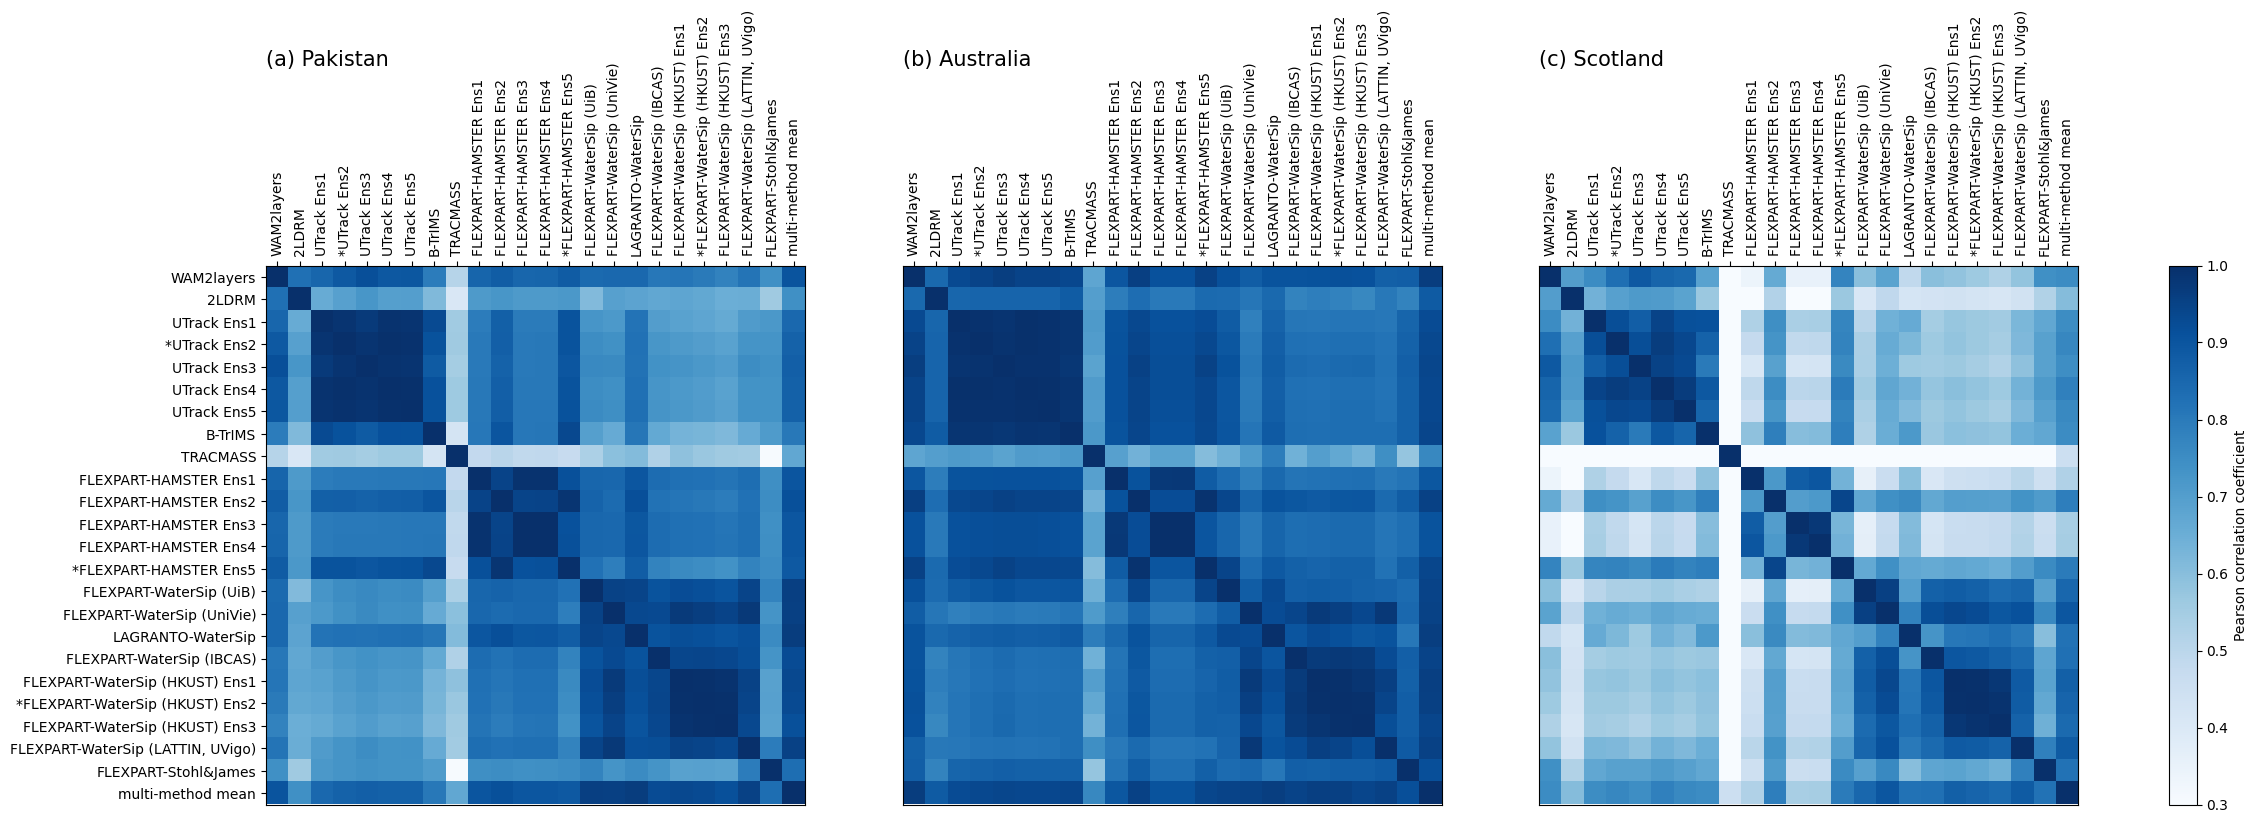

In [4]:
plt.close()
fig = plt.figure(figsize=(25, 7))
fig.patch.set_facecolor("white")
gs = gridspec.GridSpec(1, 4, width_ratios=[20, 20, 20, 1])
letters = ["(a)", "(b)", "(c)"]

for i, casename in enumerate(casenames):
    ax = fig.add_subplot(gs[0, i])
    corr_matrix_sel = corr_matrix[casename]#.drop(index="mean", columns="mean")
    plt.imshow(corr_matrix_sel, vmin=0.3, vmax=1, cmap="Blues")
    plt.xticks(np.arange(len(corr_matrix_sel.columns)))
    plt.yticks(np.arange(len(corr_matrix_sel.index)))
    ax.set_xticklabels(corr_matrix_sel.columns, rotation=90)
    if i == 0:
        ax.set_yticklabels(corr_matrix_sel.index)
    else:
        ax.set_yticks([])
    ax.xaxis.tick_top()
    plt.text(
        0,
        1.4,
        f"{letters[i]} {casenames[i]}",
        transform=ax.transAxes,
        va="top",
        ha="left",
        fontsize=15,
    )
cax = fig.add_subplot(gs[0, -1])
plt.colorbar(ax=ax, cax=cax, label="Pearson correlation coefficient")
plt.savefig(f"{figure_path}Figure6_CorrelationMatrix.png", bbox_inches="tight", dpi=600)

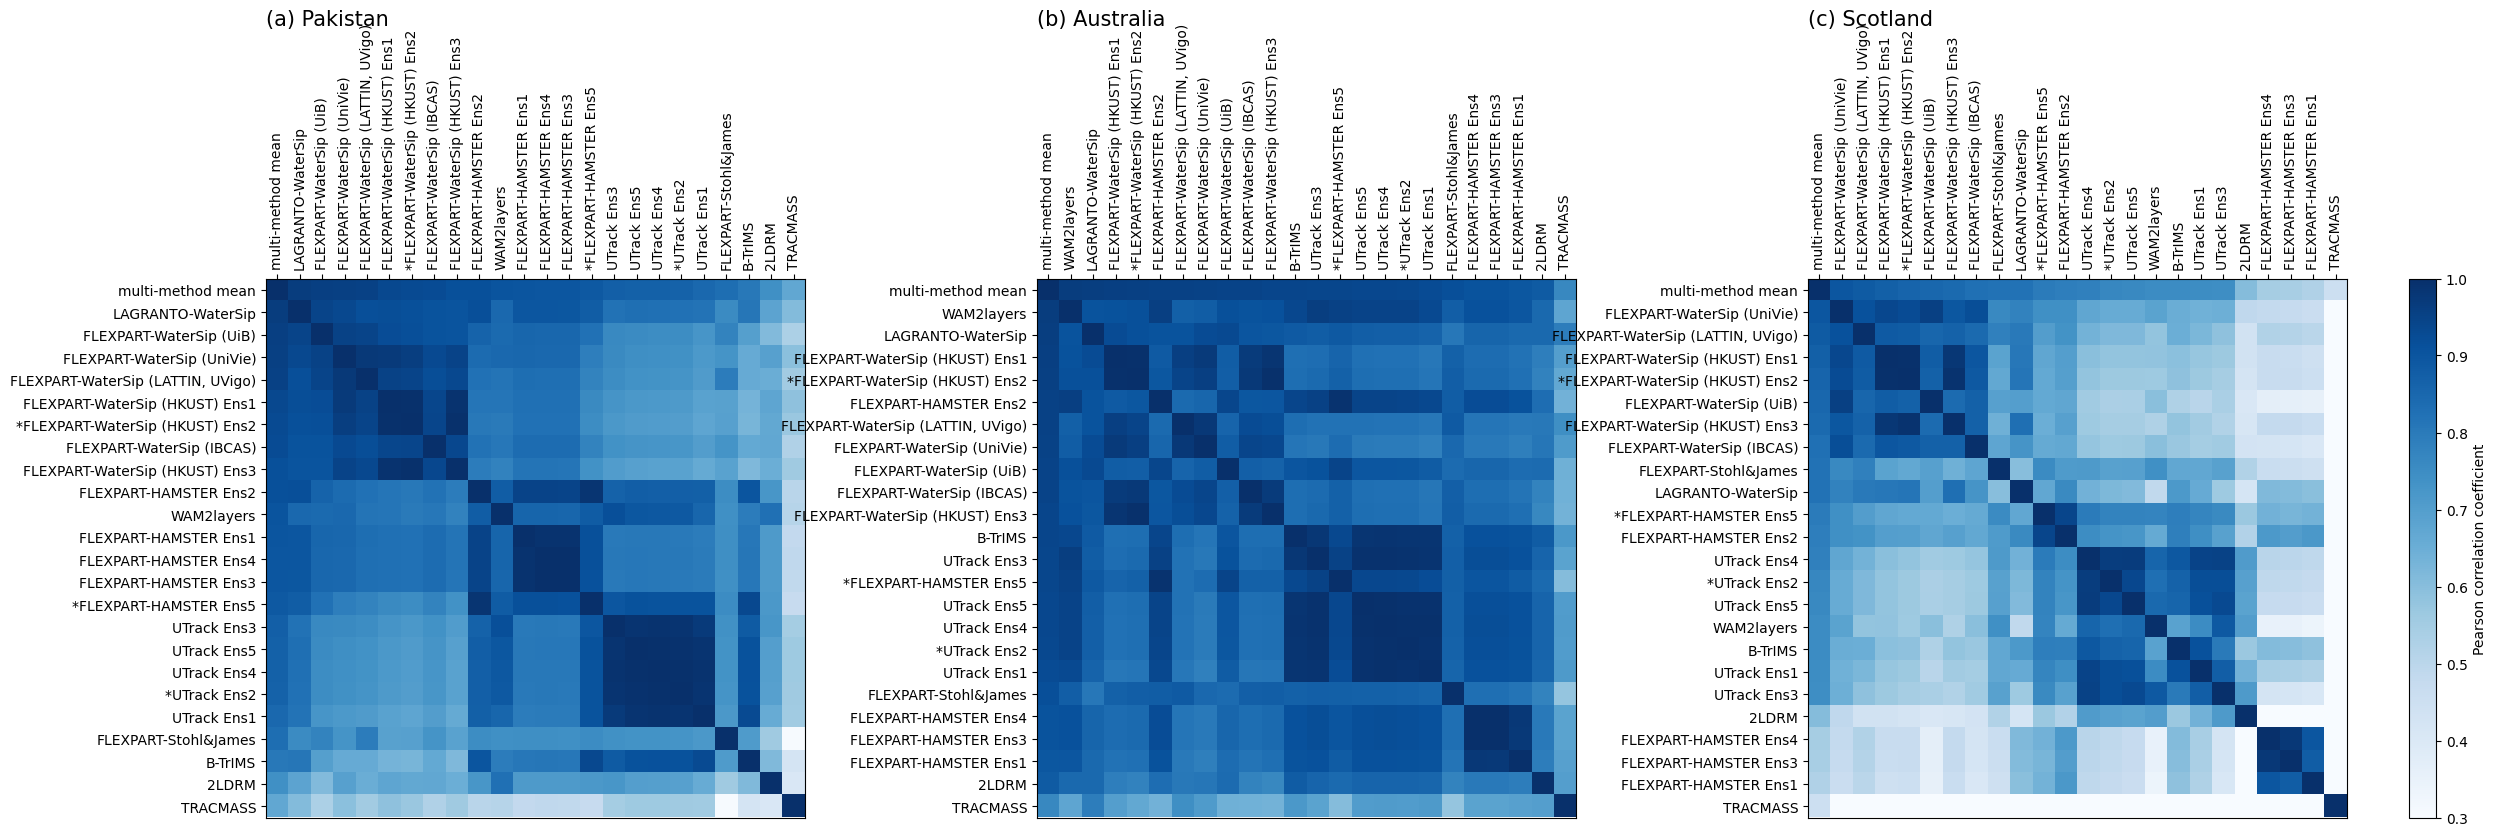

In [6]:
# Sorted with respect to multimodel mean (just for interpretation)
plt.close()
fig = plt.figure(figsize=(28, 7))
fig.patch.set_facecolor("white")
gs = gridspec.GridSpec(1, 6, width_ratios=[20, 4, 20, 4, 20, 1])
letters = ["(a)", "(b)", "(c)"]

for i, casename in enumerate(casenames):
    ax = fig.add_subplot(gs[0, 2 * i])
    corr_matrix_sorted = corr_matrix[casename].sort_values(
        by="multi-method mean", axis=0, ascending=False
    )  # sort rows
    corr_matrix_sorted = corr_matrix_sorted[corr_matrix_sorted.index]  # sort columns
    plt.imshow(corr_matrix_sorted, vmin=0.3, vmax=1, cmap="Blues")
    plt.xticks(np.arange(len(corr_matrix_sorted.columns)))
    plt.yticks(np.arange(len(corr_matrix_sorted.index)))
    ax.set_xticklabels(corr_matrix_sorted.columns, rotation=90)
    ax.set_yticklabels(corr_matrix_sorted.index)
    ax.xaxis.tick_top()
    plt.text(
        0,
        1.5,
        f"{letters[i]} {casenames[i]}",
        transform=ax.transAxes,
        va="top",
        ha="left",
        fontsize=15,
    )
cax = fig.add_subplot(gs[0, -1])
plt.colorbar(ax=ax, cax=cax, label="Pearson correlation coefficient")
plt.savefig(
    f"{figure_path}Figure6_CorrelationMatrix_sorted.png", bbox_inches="tight", dpi=300
)